In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_emp_data = pd.read_csv('general_data.csv')
df_emp_survey = pd.read_csv('employee_survey_data.csv')

In [42]:
df_emp_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [43]:
df_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [44]:
# Imputing Employee data columns nulls
df_emp_data.TotalWorkingYears.fillna(0,inplace=True)
df_emp_data.NumCompaniesWorked.fillna(0,inplace=True)

In [45]:
df_emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4410 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [46]:
df_emp_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
EmployeeID                 4410 non-null int64
EnvironmentSatisfaction    4385 non-null float64
JobSatisfaction            4390 non-null float64
WorkLifeBalance            4372 non-null float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [47]:
df_emp_survey.isna().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [48]:
df_emp_survey['EnvironmentSatisfaction'].fillna(df_emp_survey['EnvironmentSatisfaction'].mode()[0],inplace=True)
df_emp_survey['JobSatisfaction'].fillna(df_emp_survey['JobSatisfaction'].mode()[0],inplace=True)
df_emp_survey['WorkLifeBalance'].fillna(df_emp_survey['WorkLifeBalance'].mode()[0],inplace=True)

In [49]:
df_emp_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
EmployeeID                 4410 non-null int64
EnvironmentSatisfaction    4410 non-null float64
JobSatisfaction            4410 non-null float64
WorkLifeBalance            4410 non-null float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [50]:
df_emp_data = pd.merge(df_emp_data,df_emp_survey,on='EmployeeID')

In [51]:
df_emp_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0


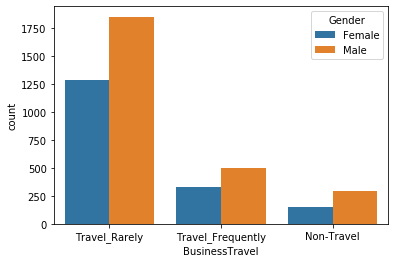

In [52]:
sns.countplot(data=df_emp_data,x='BusinessTravel',hue='Gender')

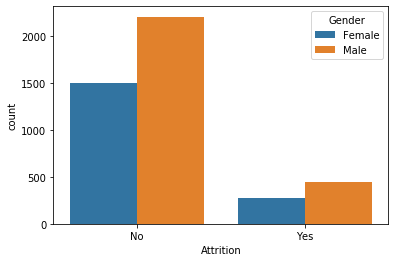

In [53]:
sns.countplot(data=df_emp_data,x='Attrition',hue='Gender')

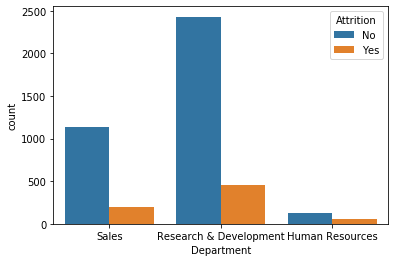

In [54]:
sns.countplot(data=df_emp_data,x='Department',hue='Attrition')

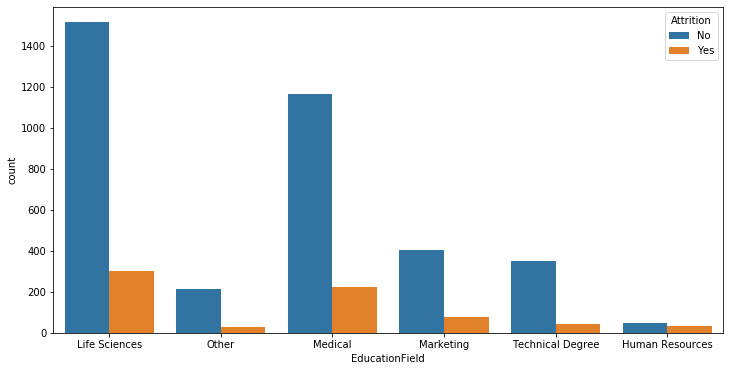

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_emp_data,x='EducationField',hue='Attrition')

In [56]:
df_emp_data.EmployeeCount.value_counts()

1    4410
Name: EmployeeCount, dtype: int64

In [57]:
df_emp_data.Over18.value_counts()

Y    4410
Name: Over18, dtype: int64

In [58]:
df_emp_data.StandardHours.value_counts()

8    4410
Name: StandardHours, dtype: int64

In [59]:
final_working_ds = df_emp_data.drop(['EmployeeCount','Over18','StandardHours','EmployeeID'],axis=1)

In [60]:
final_working_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 23 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4410 non-null float64
PercentSalaryHike          4410 non-null int64
StockOptionLevel           4410 non-null int64
TotalWorkingYears          4410 non-null float64
TrainingTimesLastYear      4410 non-null int64
YearsAtCompany             4410 non-null int64
YearsSinceLastPromotion    4410 non-

In [61]:
final_working_ds.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2.063946,65029.312925,2.683220,15.209524,0.793878,11.256916,2.799320,7.008163,2.187755,4.123129,2.725170,2.734014,2.763492
std,9.133301,8.105026,1.023933,1.106689,47068.888559,2.499737,3.659108,0.851883,7.790928,1.288978,6.125135,3.221699,3.567327,1.089852,1.102071,0.703541
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000


In [62]:
def impute_age(age):
    if (age>15 & age<=30):
        return 1
    elif (age>30 & age<=45):
        return 2
    elif (age>45 & age<=60):
        return 3

final_working_ds['Age']=final_working_ds.Age.apply(impute_age)

In [63]:
final_working_ds.Gender.value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

In [64]:
gender_dummy = pd.get_dummies(final_working_ds['Gender'],drop_first=True)

In [65]:
final_working_ds = pd.concat([final_working_ds,gender_dummy],axis=1)

In [66]:
final_working_ds.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Male
0,1,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,0,1.0,6,1,0,0,3.0,4.0,2.0,0
1,1,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,1,6.0,3,5,1,4,3.0,2.0,4.0,0
2,1,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,3,5.0,2,5,0,3,2.0,2.0,1.0,1
3,1,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,3,13.0,5,8,7,5,4.0,4.0,3.0,1
4,1,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,2,9.0,2,6,0,4,4.0,1.0,3.0,1


In [67]:
final_working_ds.drop(['Gender'],inplace=True,axis=1)

In [68]:
from sklearn.preprocessing import LabelEncoder
LabelE_BusinessTravel = LabelEncoder()
final_working_ds['BusinessTravel'] = LabelE_BusinessTravel.fit_transform(final_working_ds['BusinessTravel'])

In [69]:
LabelE_Department = LabelEncoder()
final_working_ds['Department'] = LabelE_Department.fit_transform(final_working_ds['Department'])
LabelE_EducationField = LabelEncoder()
final_working_ds['EducationField'] = LabelE_EducationField.fit_transform(final_working_ds['EducationField'])
LabelE_JobRole = LabelEncoder()
final_working_ds['JobRole'] = LabelE_JobRole.fit_transform(final_working_ds['JobRole'])
LabelE_MaritalStatus = LabelEncoder()
final_working_ds['MaritalStatus'] = LabelE_MaritalStatus.fit_transform(final_working_ds['MaritalStatus'])
LabelE_Attrition = LabelEncoder()
final_working_ds['Attrition'] = LabelE_Attrition.fit_transform(final_working_ds['Attrition'])
#LabelE_Gender = LabelEncoder()
#final_working_ds['Gender'] = LabelE_Gender.fit_transform(final_working_ds['Gender'])

In [70]:
final_working_ds.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Male
0,1,0,2,2,6,2,1,1,0,1,...,0,1.0,6,1,0,0,3.0,4.0,2.0,0
1,1,1,1,1,10,1,1,1,6,2,...,1,6.0,3,5,1,4,3.0,2.0,4.0,0
2,1,0,1,1,17,4,4,4,7,1,...,3,5.0,2,5,0,3,2.0,2.0,1.0,1
3,1,0,0,1,2,5,1,3,1,1,...,3,13.0,5,8,7,5,4.0,4.0,3.0,1
4,1,0,2,1,10,1,3,1,7,2,...,2,9.0,2,6,0,4,4.0,1.0,3.0,1


In [71]:
from sklearn.preprocessing import StandardScaler
scalr = StandardScaler()
scalr.fit(final_working_ds.drop('Attrition',axis=1))
scaled_features = scalr.transform(final_working_ds.drop('Attrition',axis=1))

In [72]:
colms = final_working_ds.columns.delete(1)
X = pd.DataFrame(scaled_features,columns=colms)
y = final_working_ds['Attrition']
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [74]:
from sklearn.linear_model import LogisticRegression
log_Reg = LogisticRegression()

In [75]:
log_Reg.fit(X_train,y_train)

C:\Users\Abhijeet\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred = log_Reg.predict(X_test)

In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1102
           1       0.62      0.09      0.16       221

    accuracy                           0.84      1323
   macro avg       0.73      0.54      0.53      1323
weighted avg       0.81      0.84      0.79      1323



In [79]:
print(confusion_matrix(y_test,y_pred))

[[1090   12]
 [ 201   20]]
